In [70]:
import _pickle as cPickle

In [27]:
import h5py

with h5py.File("/data/softec-lagrangian-nowcasting/outputs/mfunet-regularizedRMSE/mfunet-regularizedRMSE.h5", "r") as f:
    keys =  f.keys()
    a_group_key = list(f.keys())[0]
    g = f.require_group(a_group_key).require_group("mfunet-regularizedRMSE")
    print(g.require_group('1')['data'])

<HDF5 dataset "data": shape (336, 336), type "|u1">


In [12]:
ds_arr

<Closed HDF5 group>

In [71]:
with open(r"/data/maly_javornik_CMAX_60k_2/motion_fields/201809021650.pkl", "rb") as input_file:
   e = cPickle.load(input_file)

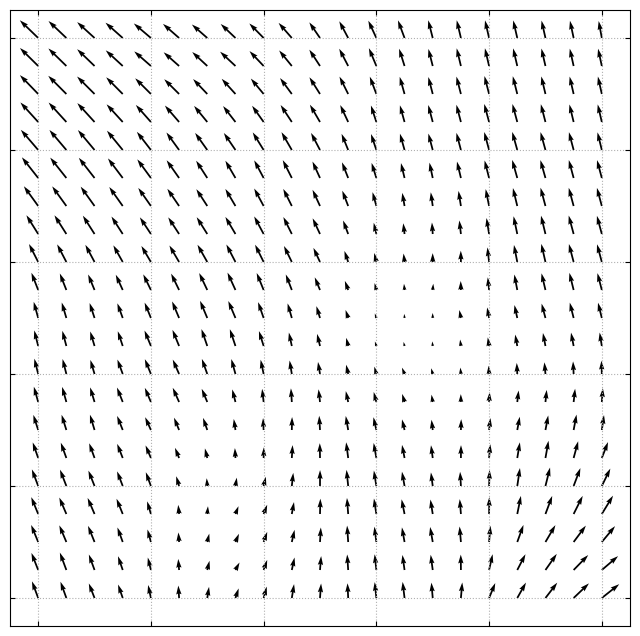

In [72]:
import matplotlib.pyplot as plt
from skimage.measure import block_reduce as br

X, Y = np.meshgrid(np.arange(0, 336, 1), np.arange(0, 336, 1))

skip = 16

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
plt.quiver(X[::skip,::skip], Y[::skip,::skip], br(e[0], (skip,skip), np.mean), br(e[1], (skip,skip), np.mean))
ax.set_xticks(np.arange(0, 336, 64))
ax.set_yticks(np.arange(0, 336, 64))
plt.grid()
ax.xaxis.grid(linestyle=':')
ax.yaxis.grid(linestyle=':')
ax.tick_params(bottom=True, top=True, left=True, right=True, labelbottom=False, labelleft=False, direction="in")

plt.show()

In [90]:
import torch
import torch.nn.functional as F

motion_field = torch.tensor(e)

sobel_x = torch.tensor([[-1.,  0.,  1.],
                        [-2.,  0.,  2.],
                        [-1.,  0.,  1.]]).view(1, 1, 3, 3).double()
sobel_y = torch.tensor([[-1., -2., -1.],
                        [ 0.,  0.,  0.],
                        [ 1.,  2.,  1.]]).view(1, 1, 3, 3).double()
diff_u = F.conv2d(motion_field[0:1], sobel_x)
diff_v = F.conv2d(motion_field[1:2], sobel_y)
torch.sum(torch.abs(diff_u + diff_v)) / (336 * 336)

tensor(0.1527, dtype=torch.float64)